In [2]:
import numpy as np
import pandas as pd
import os

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Temp,Humd,Label
0,23,34,1
1,23,34,1
2,23,34,1
3,23,37,1
4,23,38,1


In [4]:
missing_values = df.isnull().sum()
print("missing values:\n", missing_values)

missing values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [5]:
df = df.drop_duplicates()

In [6]:
x = df.drop(['Label'], axis=1)
y = df['Label']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
z = KNeighborsClassifier(n_neighbors=3)
KNN = z.fit(x_train, y_train)

In [9]:
predict = KNN.predict(x_test)

print("accuracy:", metrics.accuracy_score(y_test, predict))


accuracy: 0.33695652173913043


In [10]:
from sklearn.metrics import confusion_matrix
y_pred= predict
cf_matrix = confusion_matrix(y_test, y_pred)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

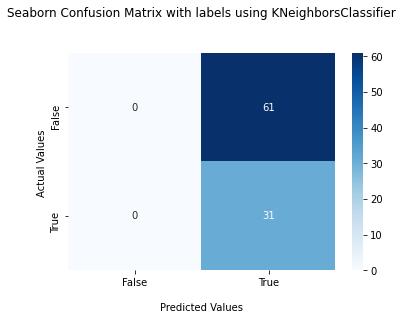

In [11]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
import matplotlib.pyplot as plt


ax.set_title('Seaborn Confusion Matrix with labels using KNeighborsClassifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
NC = clf.fit(x_train,y_train)
PredictNC = NC.predict(x_test)
PredictNC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [13]:
cf_matrix = confusion_matrix(y_test, PredictNC)

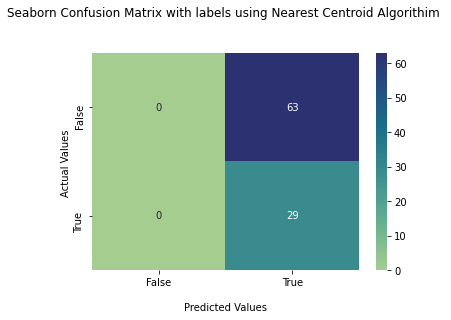

In [14]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='crest')
import matplotlib.pyplot as plt


ax.set_title('Seaborn Confusion Matrix with labels using Nearest Centroid Algorithim \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [15]:
print(f"Accuracy Score : {metrics.accuracy_score(y_test, PredictNC) * 100} %")


Accuracy Score : 31.521739130434785 %


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn import tree 
regr =tree.DecisionTreeRegressor()
regr = regr.fit(x_train,y_train)


In [17]:
y_regr = regr.predict(x_test)

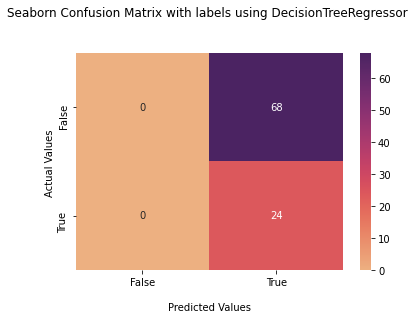

In [23]:
cf_matrix = confusion_matrix(y_test, y_regr)
ax = sns.heatmap(cf_matrix, annot=True, cmap='flare')
import matplotlib.pyplot as plt


ax.set_title('Seaborn Confusion Matrix with labels using DecisionTreeRegressor \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
print(f"Accuracy Score : {metrics.accuracy_score(y_test, y_regr) * 100} %")


Accuracy Score : 26.08695652173913 %


In [20]:
import pickle 

filename = "Kneighborsmodel.pickle"

pickle.dump(z, open(filename,"wb"))




In [21]:
filename2 = 'NearestCentroid.pickle'

pickle.dump(clf, open(filename2,"wb"))

In [22]:
filename3 = "Regressor.pickle"
pickle.dump(regr, open(filename3, "wb"))